# **Face Mask Detection**

***

## **AIM : Developing a model that can detect if a person wear face masks or not.**

>

#### **Importing all necessary libraries**

In [1]:
import PIL, os, cv2
import numpy as np
import pandas as pd
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

#### **Define a function that load and preprocess data from directory.**

In [2]:
def get_data(dir_path):
    x, y = [], []
    category = {"Non Mask":0,"Mask":1}
    folders = os.listdir(dir_path)
    for folder in folders:
        folder_path = os.path.join(dir_path,folder)
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path,file)
            x.append(cv2.resize(cv2.imread(file_path),(224,224)))
            y.append(category[folder])
        print(folder,"Folder Done")
    x = np.array(x)
    y = np.array(y)
    x,y = shuffle(x,y)
    x = x / 255
    print("Shuffle and feature scaling Done")
    print("X Shape :",x.shape)
    print('Y Shape :',y.shape)
    print("Unique Categories :",np.unique(y,return_counts=True)[0])
    print("Unique Categories counts :",np.unique(y,return_counts=True)[1])
    return x, y

#### **Load and preprocess Train Dataset**

In [3]:
xtrain, ytrain = get_data('covid-face-mask-detection-dataset/Train')

Non Mask Folder Done
Mask Folder Done
Shuffle and feature scaling Done
X Shape : (600, 224, 224, 3)
Y Shape : (600,)
Unique Categories : [0 1]
Unique Categories counts : [300 300]


#### **Load and preprocess Validation Dataset**

In [4]:
xvalid, yvalid = get_data('covid-face-mask-detection-dataset/Validation')

Non Mask Folder Done
Mask Folder Done
Shuffle and feature scaling Done
X Shape : (306, 224, 224, 3)
Y Shape : (306,)
Unique Categories : [0 1]
Unique Categories counts : [153 153]


#### **Load and preprocess Test Dataset**

In [5]:
xtest, ytest = get_data('covid-face-mask-detection-dataset/Test')

Non Mask Folder Done
Mask Folder Done
Shuffle and feature scaling Done
X Shape : (100, 224, 224, 3)
Y Shape : (100,)
Unique Categories : [0 1]
Unique Categories counts : [50 50]


## **Deep Learning using CNN**

#### **Developing a Convolution Neural Network model**

In [6]:
cnn = keras.Sequential(
    
                            [
                                
                                # Input
                                keras.layers.Input(shape=(224,224,3)),
                                
                                # CNN
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.75),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.50),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.25),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(50,activation='relu'),
                                keras.layers.Dense(10,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

cnn.summary()

2021-10-23 19:10:41.846974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 200)     5600      
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 200)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 200)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 200)     360200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 200)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 200)       3

2021-10-23 19:10:41.847957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 19:10:41.848634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 19:10:41.849942: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-23 19:10:41.851034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

#### **Visualize the Model**

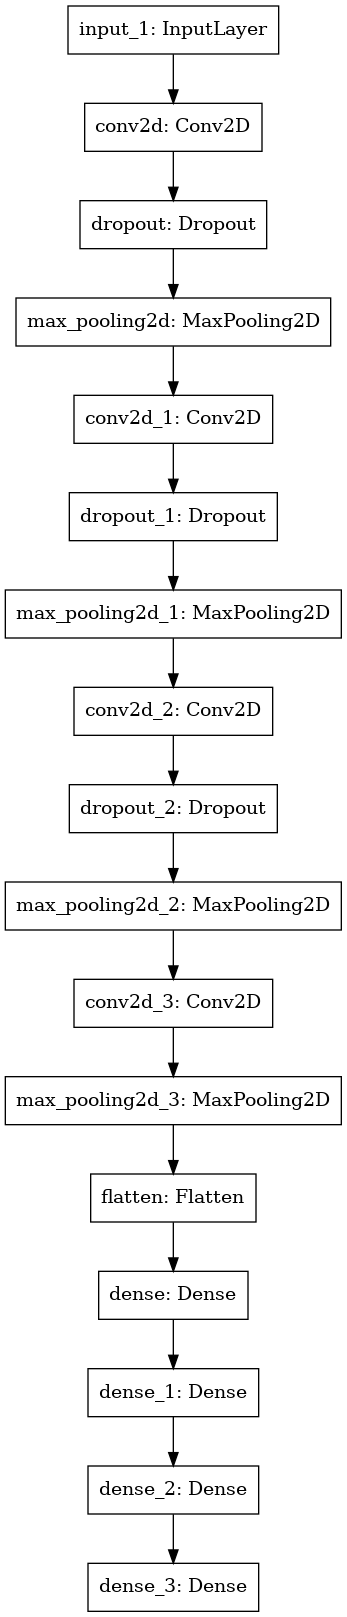

In [7]:
keras.utils.plot_model(cnn)

#### **Train the Model**

In [8]:
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training = cnn.fit(xtrain,ytrain,batch_size=10,validation_data=(xvalid,yvalid),epochs=10)

2021-10-23 19:10:46.344391: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-10-23 19:10:47.787834: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


60/60 [==============================] - 13s 92ms/step - loss: 1.0173 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
60/60 [==============================] - 5s 76ms/step - loss: 0.6347 - accuracy: 0.6150 - val_loss: 0.6474 - val_accuracy: 0.7320
Epoch 3/10
60/60 [==============================] - 5s 77ms/step - loss: 0.4236 - accuracy: 0.8033 - val_loss: 0.6003 - val_accuracy: 0.7484
Epoch 4/10
60/60 [==============================] - 5s 76ms/step - loss: 0.4227 - accuracy: 0.8267 - val_loss: 0.6661 - val_accuracy: 0.6928
Epoch 5/10
60/60 [==============================] - 5s 76ms/step - loss: 0.5405 - accuracy: 0.7617 - val_loss: 0.6334 - val_accuracy: 0.6471
Epoch 6/10
60/60 [==============================] - 5s 76ms/step - loss: 0.4635 - accuracy: 0.7917 - val_loss: 0.5966 - val_accuracy: 0.7745
Epoch 7/10
60/60 [==============================] - 5s 75ms/step - loss: 0.3940 - accuracy: 0.8317 - val_loss: 0.5704 - val_accuracy: 0.7876
Epoch 8/10
60/60 [=====

#### **Training History**

In [2]:
training_history = pd.DataFrame(training.history)
training_history

,loss,accuracy,val_loss,val_accuracy
0,1.017319,0.501667,0.693139,0.500000
1,0.634690,0.615000,0.647372,0.732026
2,0.423583,0.803333,0.600273,0.748366
3,0.422731,0.826667,0.666090,0.692810
4,0.540465,0.761667,0.633400,0.647059
5,0.463520,0.791667,0.596587,0.774510
6,0.393972,0.831667,0.570444,0.787582
7,0.332181,0.863333,0.512975,0.846405
8,0.326120,0.855000,0.564332,0.823529
9,0.199948,0.921667,0.456472,0.879085


#### **Visualizing Training History**

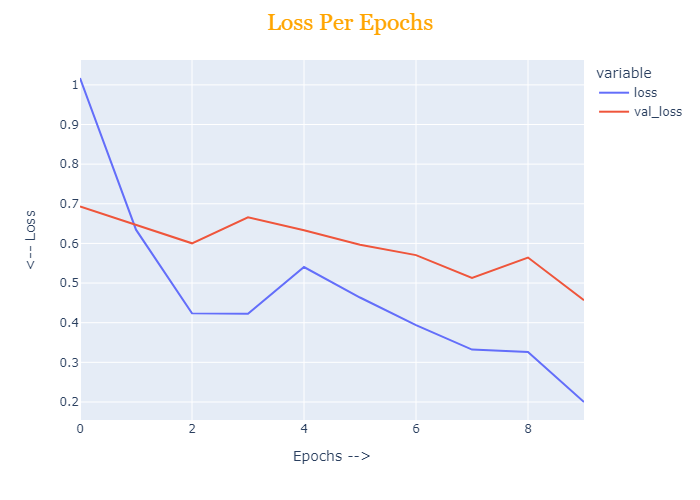

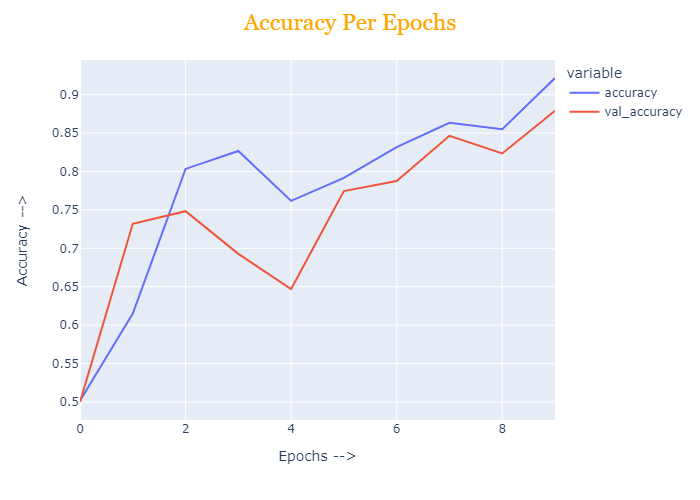

In [4]:
fig = px.line(training_history[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig.show('png')
fig = px.line(training_history[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig.show('png')

#### **Analysing Model performence on Test Data**

In [11]:
ypred = []
for pred in cnn.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))



Confusion Matrix : 

 [[42  8]
 [ 1 49]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.84      0.90        50
           1       0.86      0.98      0.92        50

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



## **Transfer Learning using ResNet152V2**

#### **Load and structuring ResNet152V2 Model from Keras applications**

In [7]:
transfer = keras.applications.ResNet152V2()
for layer in transfer.layers:
    layer.trainable = False
inp = transfer.layers[0].input
out = transfer.layers[-2].output
out = keras.layers.Dense(50,activation='relu')(out)
out = keras.layers.Dense(25,activation='relu')(out)
out = keras.layers.Dense(10,activation='relu')(out)
out = keras.layers.Dense(5,activation='relu')(out)
out = keras.layers.Dense(1,activation='sigmoid')(out)
transfer = keras.Model(inputs=inp,outputs=out)
transfer.summary()

2021-10-23 19:02:52.138542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 19:02:52.139701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 19:02:52.140400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 19:02:52.141274: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

242761728/242745792 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________

#### **Visualize the Model**

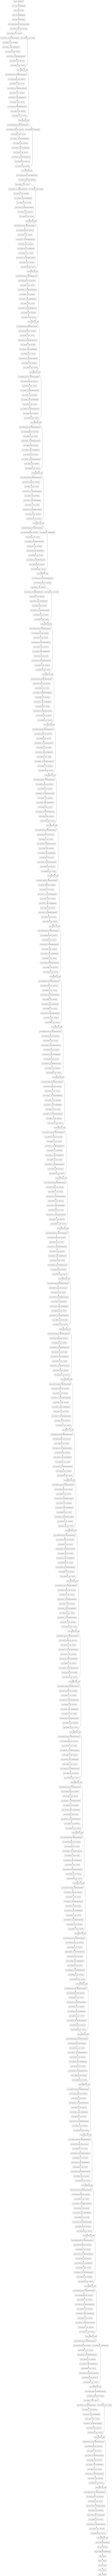

In [8]:
keras.utils.plot_model(transfer)

#### **Train the Model**

In [10]:
transfer.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training = transfer.fit(xtrain,ytrain,batch_size=10,validation_data=(xvalid,yvalid),epochs=10)

Epoch 1/10


2021-10-23 19:04:05.884613: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


60/60 [==============================] - 22s 134ms/step - loss: 0.1029 - accuracy: 0.9700 - val_loss: 0.0121 - val_accuracy: 0.9935
Epoch 2/10
60/60 [==============================] - 5s 86ms/step - loss: 0.0227 - accuracy: 0.9917 - val_loss: 0.0153 - val_accuracy: 0.9967
Epoch 3/10
60/60 [==============================] - 5s 84ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9967
Epoch 4/10
60/60 [==============================] - 5s 85ms/step - loss: 0.0036 - accuracy: 0.9983 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/10
60/60 [==============================] - 5s 86ms/step - loss: 2.2599e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
60/60 [==============================] - 6s 99ms/step - loss: 1.5739e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/10
60/60 [==============================] - 6s 99ms/step - loss: 1.2622e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 8/10

#### **Training History**

In [5]:
training_history = pd.read_json('training_history2.json')
training_history

,loss,accuracy,val_loss,val_accuracy
0,0.102851,0.970000,0.012131,0.993464
1,0.022693,0.991667,0.015291,0.996732
2,0.001167,1.000000,0.015033,0.996732
3,0.003617,0.998333,0.002881,1.000000
4,0.000226,1.000000,0.003281,1.000000
5,0.000157,1.000000,0.003491,1.000000
6,0.000126,1.000000,0.003403,1.000000
7,0.000105,1.000000,0.003071,1.000000
8,0.000087,1.000000,0.003060,1.000000
9,0.000074,1.000000,0.002982,1.000000


#### **Visualize Training History**

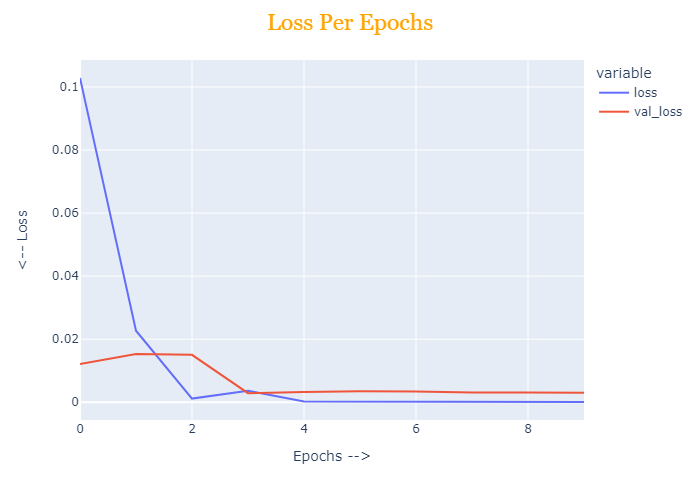

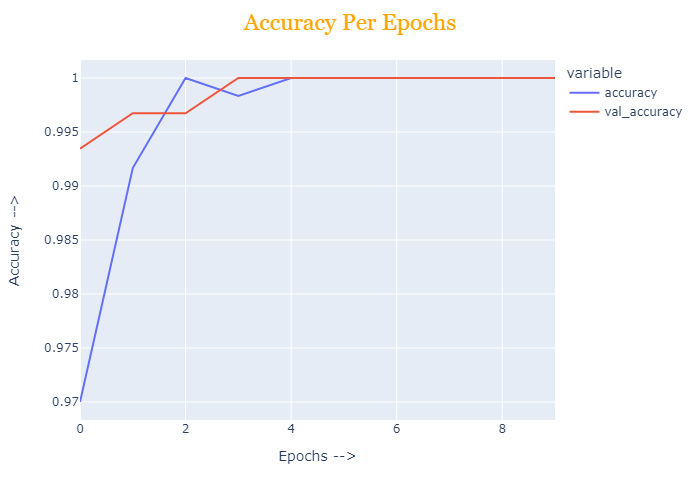

In [6]:
fig = px.line(training_history[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig.show('png')
fig = px.line(training_history[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig.show('png')

#### **Analysing Model performence on Test Data**

In [13]:
ypred = []
for pred in transfer.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))



Confusion Matrix : 

 [[50  0]
 [ 0 50]]


Classification Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



#### **So by overall analysis, Resnet152V2 model is 100% perfectly able to detect that a person wear face masks or not. So, I concluded this model as the best Model for any face masks detection System in industry.**

#### **Save the Model**

In [119]:
transfer.save('covid_mask_detection_model.h5')

#### **Load the Model**

In [7]:
model = keras.models.load_model('covid_mask_detection_model.h5')

#### **Define a function that predict and return prediction**

In [8]:
def predict(img):
    if type(img) == str:
        img = cv2.imread(img)
    img = cv2.resize(img,(224,224))
    img = img / 255
    if model.predict(np.array([img]))[0] > 0.5:
        predict = 1 # Mask Recognized
    else:
        predict = 0 # Mask not Recognized
    return predict

#### **Define a function that return Image with Prediction**

In [9]:
def view_prediction(img,res='mob'):
    if type(img) == str:
        img = cv2.imread(img)
    if res == 'mob' :
        img = cv2.resize(img,(480,640))
    else :
        img = cv2.resize(img,(640,480))
    if predict(img) == 1:
        img = cv2.rectangle(img,(0,0),(640,50),(242,221,203),-1)
        img = cv2.putText(img,"Mask Detected",(30,30),cv2.FONT_HERSHEY_COMPLEX,0.75,(255,61,142),2)
    else:
        img = cv2.rectangle(img,(0,0),(640,50),(186,186,245),-1)
        img = cv2.putText(img,"Mask not Detected",(30,30),cv2.FONT_HERSHEY_COMPLEX,0.75,(56,56,255),2)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return PIL.Image.fromarray(img)

#### **Sample Prediction 1**

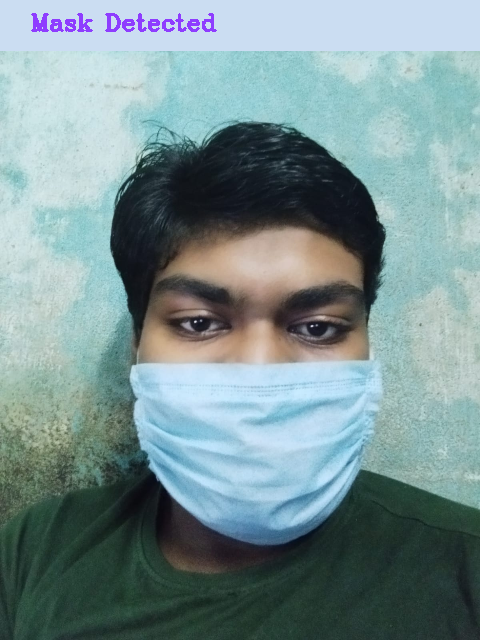

In [10]:
view_prediction('image1.jpeg')

#### **Sample Prediction 2**

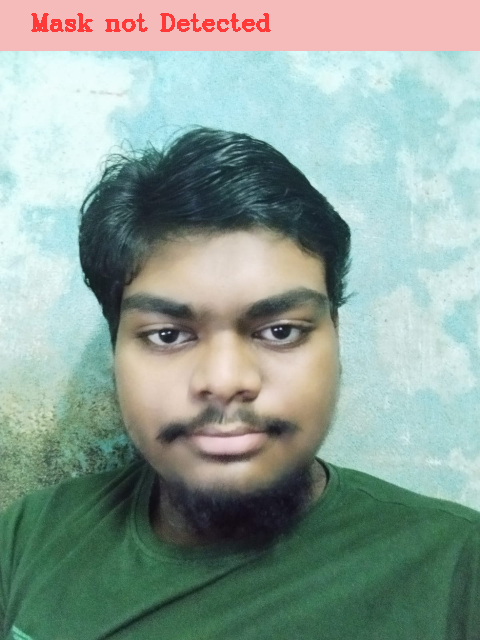

In [11]:
view_prediction('image2.jpeg')

#### **Live Mask detection on Webcam**

In [12]:
video = cv2.VideoCapture(0)
writer = cv2.VideoWriter('live_webcam_mask_detection_demo.mp4',cv2.VideoWriter_fourcc(*'XVID'),5,(640,480))

while True:
    
    ret, frame = video.read()
    
    if ret == False :
        break
    
    frame = np.array(view_prediction(frame,'lap'))
    frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
    writer.write(frame)
    cv2.imshow('Camera',frame)
    
    if cv2.waitKey(20) == 13:
        break

video.release()
writer.release()
cv2.destroyAllWindows()

# **Thank You**